In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-dataset/Email spam.csv


In [2]:
import matplotlib.pyplot as plt
import regex as re
import sqlite3

In [3]:
df=pd.read_csv("../input/email-spam-dataset/Email spam.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
print(df.shape)

df=df.drop_duplicates()

print(df.shape)

(5728, 2)
(5695, 2)


In [5]:
df = df.reset_index(inplace = False)[['text','spam']]
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Data cleaning

In [6]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()        
df.head(3)

,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1


# Creating word embedding

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

text_vec=CountVectorizer().fit_transform(df['text'])
text_vec

<5695x33688 sparse matrix of type '<class 'numpy.int64'>'
	with 660304 stored elements in Compressed Sparse Row format>

# Train test split

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(text_vec,df['spam'],test_size=0.4,random_state=44,shuffle=True)

# Gradient Boosting classifier

In [9]:
from sklearn import ensemble

classifier=ensemble.GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,max_depth=6)

In [10]:
classifier.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=6)

In [11]:
from sklearn.metrics import accuracy_score

ypred=classifier.predict(xtest)

acc=accuracy_score(ypred,ytest)*100
acc

97.41000877963126

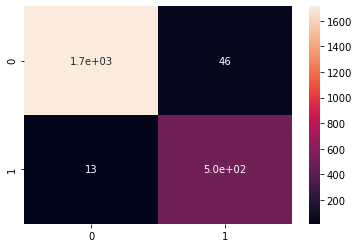

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(ypred,ytest),annot=True)

# Sentiment analysis

In [13]:
from textblob import TextBlob

#load the descriptions into textblob
email_blob = [TextBlob(text) for text in df['text']]
#add the sentiment metrics to the dataframe
df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]
#show dataframe
df.head(3)

,index,text,spam,tb_Pol,tb_Subj
0,0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581


**tb_pol indicatin the polarity,tells it is positive if it is >0**

### Here the positive class is spam